http://nbviewer.jupyter.org/github/tfolkman/learningwithdata/blob/master/Logistic%20Gradient%20Descent.ipynb
    
    Logistic regression is an excellent tool to know for classification problems. Classification problems are problems where you are trying to classify observations into groups. To make our examples more concrete, we will consider the Iris dataset. The iris dataset contains 4 attributes for 3 types of iris plants. The purpose is to classify which plant you have just based on the attributes. To simplify things, we will only consider 2 attributes and 2 classes. Here are the data visually:


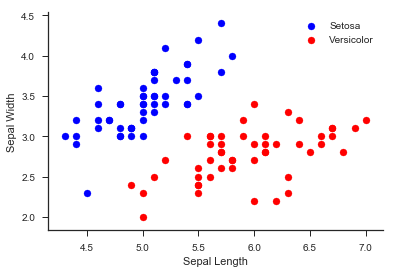

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')
import pandas as pd
import numpy as np
import math
from __future__ import division

data = datasets.load_iris()
X = data.data[:100, :2]
y = data.target[:100]
X_full = data.data[:100, :]

setosa = plt.scatter(X[:50,0], X[:50,1], c='b')
versicolor = plt.scatter(X[50:,0], X[50:,1], c='r')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend((setosa, versicolor), ("Setosa", "Versicolor"))
sns.despine()

# Wow! 
This is nice - the two classes are completely separate. Now this obviously is a toy example, but let's now think about how to create a learning algorithm to give us the probability that given Sepal Width and Sepal Length the plant is Setosa. So if our algorithm returns .9 we place 90% probability on the plant being Setosa and 10% probability on it being Versicolor.
Logisitic Function

So we want to return a value between 0 and 1 to make sure we are actually representing a probability. To do this we will make use of the logistic function. The logistic function mathematically looks like this:
y=11+e−x

Let's take a look at the plot:

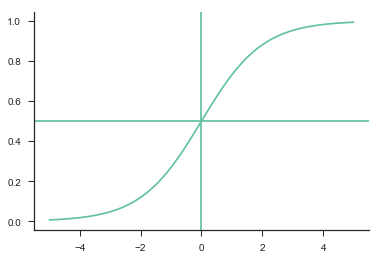

In [2]:
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + math.e**(-x)) for x in x_values]
plt.plot(x_values, y_values)
plt.axhline(.5)
plt.axvline(0)
sns.despine()

You can see why this is a great function for a probability measure. The y-value represents the probability and only ranges between 0 and 1. Also, for an x value of zero you get a .5 probability and as you get more positive x values you get a higher probability and more negative x values a lower probability.
Make use of your data

Okay - so this is nice, but how the heck do we use it? Well we know we have two attributes - Sepal length and Sepal width - that we need to somehow use in our logistic function. One pretty obvious thing we could do is:

x=β0+β1SW+β2SL

Where SW is our value for sepal width and SL is our value for sepal length. For those of you familiar with Linear Regression this looks very familiar. Basically we are assuming that x is a linear combination of our data plus an intercept. For example, say we have a plant with a sepal width of 3.5 and a sepal length of 5 and some oracle tells us that β0=1
, β1=2, and β2=4

. This would imply:

x=1+(2∗3.5)+(4∗5)=28

Plugging this into our logistic function gives:

11+e−28=.99

So we would give a 99% probability to a plant with those dimensions as being Setosa.
Learning

Okay - makes sense. But who is this oracle giving us our β
values? Good question! This is where the learning in machine learning comes in :). We will learn our β

values.
Step 1 - Define your cost function

If you have been around machine learning, you probably hear the phrase "cost function" thrown around. Before we get to that, though, let's do some thinking. We are trying to choose β
values in order to maximize the probability of correctly classifying our plants. That is just the definition of our problem. Let's say someone did give us some β

values, how would we determine if they were good values or not? We saw above how to get the probability for one example. Now imagine we did this for all our plant observations - all 100. We would now have 100 probability scores. What we would hope is that for the Setosa plants, the probability values are close to 1 and for the Versicolor plants the probability is close to 0.

But we don't care about getting the correct probability for just one observation, we want to correctly classify all our observations. If we assume our data are independent and identically distributed, we can just take the product of all our individually calculated probabilities and that is the value we want to maximize. So in math:
∏Setosa11+e−(β0+β1SW+β2SL)∏Versicolor1−11+e−(β0+β1SW+β2SL)
If we define the logistic function as:
h(x)=11+e−x
and x as:
x=β0+β1SW+β2SL
This can be simplified to:
∏Setosah(x)∏Versicolor1−h(x)

The ∏
symbol means take the product for the observations classified as that plant. Here we are making use of the fact that are data are labeled, so this is called supervised learning. Also, you will notice that for Versicolor observations we are taking 1 minus the logistic function. That is because we are trying to find a value to maximize, and since Versicolor observations should have a probability close to zero, 1 minus the probability should be close to 1. So now we know that we want to maximize the following:
∏Setosah(x)∏Versicolor1−h(x)

So we now have a value we are trying to maximize. Typically people switch this to minimization by making it negative:
−∏Setosah(x)∏Versicolor1−h(x)

Note: minimizing the negative is the same as maximizing the positive. The above formula would be called our cost function.
Step 2 - Gradients

So now we have a value to minimize, but how do we actually find the β

values that minimize our cost function? Do we just try a bunch? That doesn't seem like a good idea...

This is where convex optimization comes into play. We know that the logistic cost function is convex - just trust me on this. And since it is convex, it has a single global minimum which we can converge to using gradient descent.

Here is an image of a convex function:

from IPython.display import Image
Image(url="http://www.me.utexas.edu/~jensen/ORMM/models/unit/nonlinear/subunits/terminology/graphics/convex1.gif")

Now you can imagine, that this curve is our cost function defined above and that if we just pick a point on the curve, and then follow it down to the minimum we would eventually reach the minimum, which is our goal. Here is an animation of that. That is the idea behind gradient descent.

So the way we follow the curve is by calculating the gradients or the first derivatives of the cost function with respect to each β

. So lets do some math. First realize that we can also define the cost function as:

−∑i=1100yilog(h(xi))+(1−yi)log(1−h(xi))

This is because when we take the log our product becomes a sum. See log rules. And if we define yi
to be 1 when the observation is Setosa and 0 when Versicolor, then we only do h(x) for Setosa and 1 - h(x) for Versicolor. So lets take the derivative of this new version of our cost function with respect to β0. Remember that our β0 is in our x value. So remember that the derivative of log(x) is 1x

, so we get (for each observation):

yih(xi)+1−yi1−h(xi)

And using the quotient rule we see that the derivative of h(x) is:

e−x(1+e−x)2=11+e−x(1−11+e−x)=h(x)(1−h(x))

And the derivative of x with respect to β0

is just 1. Putting it all together we get:

yih(xi)(1−h(xi))h(xi)−(1−yi)h(xi)(1−h(xi))1−h(xi)

Simplify to:

yi(1−h(xi))−(1−yi)h(xi)=yi−yih(xi)−h(xi)+yih(xi)=yi−h(xi)

Bring in the neative and sum and we get the partial derivative with respect to β0

to be:

∑i=1100h(xi)−yi

Now the other partial derivaties are easy. The only change is now the derivative for xi
is no longer 1. For β1 it is SWi and for β2 it is SLi. So the partial derivative for β1

is:

∑i=1100(h(xi)−yi)SWi

For β2

:

∑i=1100(h(xi)−yi)SLi

Step 3 - Gradient Descent

So now that we have our gradients, we can use the gradient descent algorithm to find the values for our β

s that minimize our cost function. The gradient descent algorithm is very simple:

    Initially guess any values for your β

values
Repeat until converge:

    βi=βi−(α∗

gradient with respect to βi) for i=0,1,2

        in our case

Here α
is our learning rate. Basically how large of steps to take on our cost curve. What we are doing is taking our current β value and then subtracting some fraction of the gradient. We subtract because the gradient is the direction of greatest increase, but we want the direction of greatest decrease, so we subtract. In other words, we pick a random point on our cost curve, check to see which direction we need to go to get closer to the minimum by using the negative of the gradient, and then update our β values to move closer to the minimum. Repeat until converge means keep updating our β values until our cost value converges - or stops decreasing - meaning we have reached the minimum. Also, it is important to update all the β values at the same time. Meaning that you use the same previous β values to update all the next β

values.
Gradient Descent Tricks

I think most of this are from Andrew Ng's machine learning course

    Normalize variables:
        This means for each variable subtract the mean and divide by standard deviation.
    Learning rate:
        If not converging, the learning rate needs to be smaller - but will take longer to converge
        Good values to try ..., .001, .003, .01, .03, .1, .3, 1, 3, ...
    Declare converges if cost decreases by less than 10−3

    (this is just a decent suggestion)
    Plot convergence as a check

Lets see some code

Below is code that implements everything we discussed. It is vectorized, though, so things are represented as vectors and matricies. It should still be fairly clear what is going on (I hope...if not, please let me know and I can put out a version closer to the math). Also, I didn't implement an intercept (so no β0

) feel free to add this if you wish :)

In [3]:
def logistic_func(theta, x):
    return float(1) / (1 + math.e**(-x.dot(theta)))

def log_gradient(theta, x, y):
    first_calc = logistic_func(theta, x) - np.squeeze(y)
    final_calc = first_calc.T.dot(x)
    return final_calc

def cost_func(theta, x, y):
    log_func_v = logistic_func(theta,x)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1-y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return np.mean(final)

In [4]:
def grad_desc(theta_values, X, y, lr=.001, converge_change=.001):
    #normalize
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    #setup cost iter
    cost_iter = []
    cost = cost_func(theta_values, X, y)
    cost_iter.append([0, cost])
    change_cost = 1
    i = 1
    while(change_cost > converge_change):
        old_cost = cost
        theta_values = theta_values - (lr * log_gradient(theta_values, X, y))
        cost = cost_func(theta_values, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost
        i+=1
    return theta_values, np.array(cost_iter)

def pred_values(theta, X, hard=True):
    #normalize
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    pred_prob = logistic_func(theta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    if hard:
        return pred_value
    return pred_prob

In [5]:
shape = X.shape[1]
y_flip = np.logical_not(y) #flip Setosa to be 1 and Versicolor to zero to be consistent
betas =np.array( [0.2,0.3]) #np.zeros(shape)
L=logistic_func(betas, X)
#G= log_gradient(betas, X, y_flip )
print('betas=', betas)
print('X.dot(betas).dtype=',X.dot(betas).dtype)
print('X.dot(betas)=',X.dot(betas))
#print('betas.dot(X)=',betas.dot(X)
print('X=',X[0:5,])
print('X.shape=',X.shape)
print('L=',L)
print(y_flip)
print(L)


betas= [ 0.2  0.3]
X.dot(betas).dtype= float64
X.dot(betas)= [ 2.07  1.88  1.9   1.85  2.08  2.25  1.94  2.02  1.75  1.91  2.19  1.98
  1.86  1.76  2.36  2.46  2.25  2.07  2.28  2.16  2.1   2.13  2.    2.01
  1.98  1.9   2.02  2.09  2.06  1.9   1.89  2.1   2.27  2.36  1.91  1.96
  2.15  1.91  1.78  2.04  2.05  1.59  1.84  2.05  2.16  1.86  2.16  1.88
  2.17  1.99  2.36  2.24  2.31  1.79  2.14  1.98  2.25  1.7   2.19  1.85
  1.6   2.08  1.86  2.09  1.99  2.27  2.02  1.97  1.9   1.87  2.14  2.06
  2.01  2.06  2.15  2.22  2.2   2.24  2.07  1.92  1.82  1.82  1.97  2.01
  1.98  2.22  2.27  1.95  2.02  1.85  1.88  2.12  1.94  1.69  1.93  2.04
  2.01  2.11  1.77  1.98]
X= [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]]
X.shape= (100, 2)
L= [ 0.88795296  0.86761113  0.86989153  0.8641271   0.88894403  0.90465054
  0.87435214  0.88288101  0.8519528   0.87101915  0.89934791  0.87868116
  0.86529695  0.85320966  0.91372581  0.92128966  0.90465054  0.88795296
  0.90720705  0.8965

In [6]:
X.dot(betas)


array([ 2.07,  1.88,  1.9 ,  1.85,  2.08,  2.25,  1.94,  2.02,  1.75,
        1.91,  2.19,  1.98,  1.86,  1.76,  2.36,  2.46,  2.25,  2.07,
        2.28,  2.16,  2.1 ,  2.13,  2.  ,  2.01,  1.98,  1.9 ,  2.02,
        2.09,  2.06,  1.9 ,  1.89,  2.1 ,  2.27,  2.36,  1.91,  1.96,
        2.15,  1.91,  1.78,  2.04,  2.05,  1.59,  1.84,  2.05,  2.16,
        1.86,  2.16,  1.88,  2.17,  1.99,  2.36,  2.24,  2.31,  1.79,
        2.14,  1.98,  2.25,  1.7 ,  2.19,  1.85,  1.6 ,  2.08,  1.86,
        2.09,  1.99,  2.27,  2.02,  1.97,  1.9 ,  1.87,  2.14,  2.06,
        2.01,  2.06,  2.15,  2.22,  2.2 ,  2.24,  2.07,  1.92,  1.82,
        1.82,  1.97,  2.01,  1.98,  2.22,  2.27,  1.95,  2.02,  1.85,
        1.88,  2.12,  1.94,  1.69,  1.93,  2.04,  2.01,  2.11,  1.77,  1.98])

Put it to the test

So here I will use the above code for our toy example. I initalize our β
values to all be zero, then run gradient descent to learn the β

values.

In [7]:
shape = X.shape[1]
y_flip = np.logical_not(y) #flip Setosa to be 1 and Versicolor to zero to be consistent
betas = np.zeros(shape)
fitted_values, cost_iter = grad_desc(betas, X, y_flip)
print(fitted_values)

#[-1.52645347  1.39922382]

[-1.52645347  1.39922382]


So I get a value of -1.5 for β1
and a value of 1.4 for β2. Remember that β1 is my coefficient for Sepal Length and β2

for Sepal Width. Meaning that as sepal width becomes larger I would have a stronger prediction for Setosa and as Sepal Length becomes larger I have more confidence it the plant being Versicolor. Which makes sense when looking at our earlier plot.

Now let's make some predictions (Note: since we are returning a probability, if the probability is greater than or equal to 50% then I assign the value to Setosa - or a value of 1):

In [8]:
predicted_y = pred_values(fitted_values, X)
predicted_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

And let's see how accurate we are:

np.sum(y_flip == predicted_y)

SyntaxError: invalid syntax (<ipython-input-9-c8eb451c9705>, line 7)

In [ ]:
Cool - we got all but 1 right. So that is pretty good. But again note: this is a very simple example, where getting all correct is actually pretty easy and we are looking at training accuracy. But that is not the point - we just want to make sure our algorithm is working.

We can do another check by taking a look at how our gradient descent converged:

plt.plot(cost_iter[:,0], cost_iter[:,1])
plt.ylabel("Cost")
plt.xlabel("Iteration")
sns.despine()

You can see that as we ran our algorithm, we continued to decrease our cost function and we stopped right at about when we see the decrease in cost to level out. Nice - everything seems to be working!

Lastly, another nice check is to see how well a packaged version of the algorithm does:

from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X, y_flip)
sum(y_flip == logreg.predict(X))

99

Cool - they also get 99 / 100 correct. Looking good :)
Advanced Optimization

So gradient descent is one way to learn our β

values, but there are some other ways too. Basically these are more advanced algorithms that I won't explain, but that can be easily run in Python once you have defined your cost function and your gradients. These algorithms are:

    BFGS
        http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fmin_bfgs.html
    L-BFGS: Like BFGS but uses limited memory
        http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_l_bfgs_b.html
    Conjugate Gradient
        http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html

Here are the very high level advantages / disadvantages of using one of these algorithms over gradient descent:

    Advantages
        Don't need to pick learning rate
        Often run faster (not always the case)
        Can numerically approximate gradient for you (doesn't always work out well)
    Disadvantages
        More complex
        More of a black box unless you learn the specifics

The one I hear most about these days is L-BFGS, so I will use it as my example. To use the others, all you do is replace the scipy function with the one in the links above. All the arguments remain the same. Also, I will now use all 4 features as opposed to just 2.
L-BFGS

from scipy.optimize import fmin_l_bfgs_b
#normalize data
norm_X = (X_full - np.mean(X_full, axis=0)) / np.std(X_full, axis=0)
myargs = (norm_X, y_flip)
betas = np.zeros(norm_X.shape[1])
lbfgs_fitted = fmin_l_bfgs_b(cost_func, x0=betas, args=myargs, fprime=log_gradient)
lbfgs_fitted[0]

array([ -1.39630462,   5.3512917 ,  -9.41860088, -10.84876254])

Above are the β

values we have learned. Now let's make some predictions.

lbfgs_predicted = pred_values(lbfgs_fitted[0], norm_X, hard=True)
sum(lbfgs_predicted == y_flip)

100

A perfect 100 - not bad.
Compare with Scikit-Learn

from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(norm_X, y_flip)
sum(y_flip == logreg.predict(norm_X))

100

Compare with our implementation

fitted_values, cost_iter = grad_desc(betas, norm_X, y_flip)
predicted_y = pred_values(fitted_values, norm_X)
sum(predicted_y == y_flip)

100

So with all 4 features we all get a perfect accuracy, which is to be expected given that the classes are linearlly seperable. So no surprise here, but it is nice to know things are working :). Note: This example doesn't really let L-BFGS shine. The purpose of this post, though, isn't to evaluate advanced optimization techniques. If this is your interest try running some tests with much larger data with many more features and less seperable classes.
Conclusion

I hope this little tutorial helped you understand in some depth logistic regression. It is a powerful tool that is good to know. It can even become more powerful with things like regularization.

Even more so, I hope this helped explain the steps of how a learning algorithm might be designed. Having a grasp on what a cost function is and how to minimize it with techniques such as gradient descent can really help understand some of the machine learning literature.

Anyway - if you have any questions or comments. I would love to hear them!